# Q2 gas_Turbines

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gas = pd.read_csv("D:/Assignment/Assingments/Neural Networks/gas_turbines.csv")

In [3]:
gas.info

<bound method DataFrame.info of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583

In [4]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
gas.shape

(15039, 11)

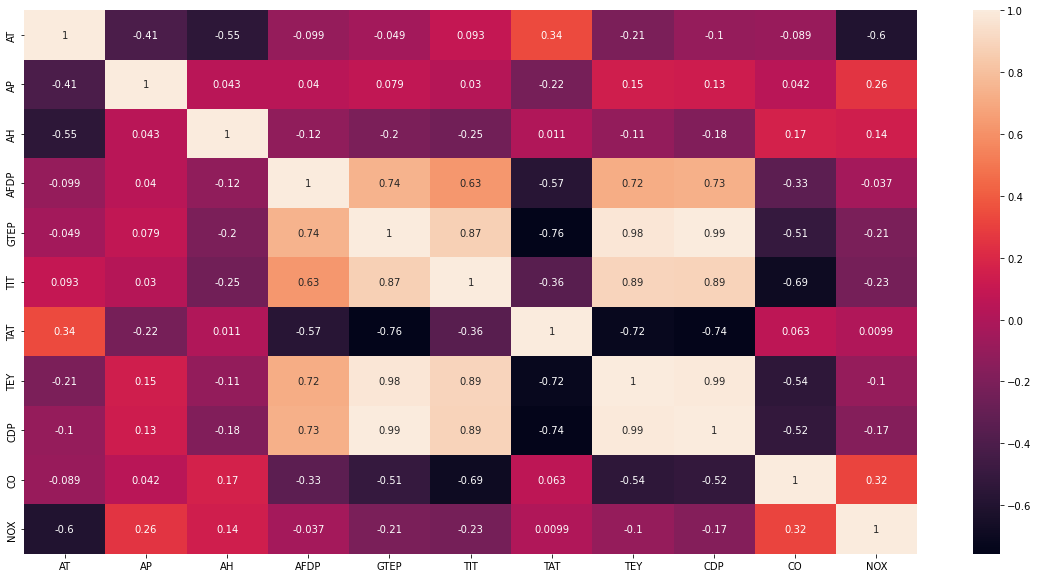

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation =gas.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [7]:
X=gas.drop(columns='TEY')
y=gas.loc[:,['TEY']]

In [8]:
# normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
X_norm = norm_func(X)
X_norm

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


# Applying NN

(1) activation = 'relu'

In [11]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_norm, y, epochs=150, batch_size=20)

Epoch 1/150
752/752 [==============================] - 2s 2ms/step - loss: -19073.7090 - accuracy: 0.0000e+00
Epoch 2/150
752/752 [==============================] - 1s 2ms/step - loss: -246545.5781 - accuracy: 0.0000e+00
Epoch 3/150
752/752 [==============================] - 1s 2ms/step - loss: -919304.0000 - accuracy: 0.0000e+00
Epoch 4/150
752/752 [==============================] - 1s 2ms/step - loss: -2160259.5000 - accuracy: 0.0000e+00
Epoch 5/150
752/752 [==============================] - 1s 2ms/step - loss: -4041169.2500 - accuracy: 0.0000e+00
Epoch 6/150
752/752 [==============================] - 1s 2ms/step - loss: -6614927.5000 - accuracy: 0.0000e+00
Epoch 7/150
752/752 [==============================] - 1s 2ms/step - loss: -9934822.0000 - accuracy: 0.0000e+00
Epoch 8/150
752/752 [==============================] - 2s 2ms/step - loss: -14053847.0000 - accuracy: 0.0000e+00
Epoch 9/150
752/752 [==============================] - 2s 2ms/step - loss: -19027030.0000 - accuracy: 0.000

Epoch 142/150
752/752 [==============================] - 1s 2ms/step - loss: -29736302592.0000 - accuracy: 0.0000e+00
Epoch 143/150
752/752 [==============================] - 1s 2ms/step - loss: -30335027200.0000 - accuracy: 0.0000e+00
Epoch 144/150
752/752 [==============================] - 1s 2ms/step - loss: -30941753344.0000 - accuracy: 0.0000e+00
Epoch 145/150
752/752 [==============================] - 1s 2ms/step - loss: -31556382720.0000 - accuracy: 0.0000e+00
Epoch 146/150
752/752 [==============================] - 1s 2ms/step - loss: -32179081216.0000 - accuracy: 0.0000e+00
Epoch 147/150
752/752 [==============================] - 1s 2ms/step - loss: -32809779200.0000 - accuracy: 0.0000e+00
Epoch 148/150
752/752 [==============================] - 1s 2ms/step - loss: -33448529920.0000 - accuracy: 0.0000e+00
Epoch 149/150
752/752 [==============================] - 1s 2ms/step - loss: -34095572992.0000 - accuracy: 0.0000e+00
Epoch 150/150
752/752 [==============================] -

# Accuracy For Train Data

In [12]:
accuracy = model1.evaluate(X, y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -16194664923136.0000 - accuracy: 0.0000e+00
Accuracy:  


(2) activation = 'tanh' 

In [13]:
# Applying NN
model2 = Sequential()
model2.add(Dense(12, input_dim=10, activation='tanh'))
model2.add(Dense(8, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

In [14]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_norm, y, epochs=150, batch_size=20)

Epoch 1/150
752/752 [==============================] - 2s 2ms/step - loss: -771.4542 - accuracy: 0.0000e+00
Epoch 2/150
752/752 [==============================] - 1s 2ms/step - loss: -1767.6158 - accuracy: 0.0000e+00
Epoch 3/150
752/752 [==============================] - 2s 3ms/step - loss: -2684.7646 - accuracy: 0.0000e+00
Epoch 4/150
752/752 [==============================] - 1s 2ms/step - loss: -3592.1245 - accuracy: 0.0000e+00
Epoch 5/150
752/752 [==============================] - 1s 2ms/step - loss: -4495.9185 - accuracy: 0.0000e+00
Epoch 6/150
752/752 [==============================] - 2s 2ms/step - loss: -5398.2788 - accuracy: 0.0000e+00
Epoch 7/150
752/752 [==============================] - 1s 2ms/step - loss: -6300.0205 - accuracy: 0.0000e+00
Epoch 8/150
752/752 [==============================] - 1s 2ms/step - loss: -7201.4434 - accuracy: 0.0000e+00
Epoch 9/150
752/752 [==============================] - 1s 2ms/step - loss: -8102.5532 - accuracy: 0.0000e+00
Epoch 10/150
752/752

Epoch 75/150
752/752 [==============================] - 1s 2ms/step - loss: -67575.5781 - accuracy: 0.0000e+00
Epoch 76/150
752/752 [==============================] - 1s 2ms/step - loss: -68476.7656 - accuracy: 0.0000e+00
Epoch 77/150
752/752 [==============================] - 1s 2ms/step - loss: -69377.9844 - accuracy: 0.0000e+00
Epoch 78/150
752/752 [==============================] - 1s 2ms/step - loss: -70279.0391 - accuracy: 0.0000e+00
Epoch 79/150
752/752 [==============================] - 1s 2ms/step - loss: -71180.1250 - accuracy: 0.0000e+00
Epoch 80/150
752/752 [==============================] - 1s 2ms/step - loss: -72081.3828 - accuracy: 0.0000e+00
Epoch 81/150
752/752 [==============================] - 1s 2ms/step - loss: -72982.4766 - accuracy: 0.0000e+00
Epoch 82/150
752/752 [==============================] - 1s 2ms/step - loss: -73883.6250 - accuracy: 0.0000e+00
Epoch 83/150
752/752 [==============================] - 1s 2ms/step - loss: -74784.7891 - accuracy: 0.0000e+00
E

752/752 [==============================] - 1s 2ms/step - loss: -133355.5000 - accuracy: 0.0000e+00
Epoch 149/150
752/752 [==============================] - 2s 2ms/step - loss: -134256.7344 - accuracy: 0.0000e+00
Epoch 150/150
752/752 [==============================] - 1s 2ms/step - loss: -135157.8750 - accuracy: 0.0000e+00


In [17]:
accuracy = model2.evaluate(X, y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 1ms/step - loss: -135609.0469 - accuracy: 0.0000e+00
Accuracy:  


(3) activation = 'softmax'

In [18]:
# Applying NN
model3 = Sequential()
model3.add(Dense(12, input_dim=10, activation='softmax'))
model3.add(Dense(8, activation='softmax'))
model3.add(Dense(1, activation='sigmoid'))

In [20]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_norm, y, epochs=150, batch_size=20)

Epoch 1/150
752/752 [==============================] - 2s 2ms/step - loss: -123.8599 - accuracy: 0.0000e+00
Epoch 2/150
752/752 [==============================] - 1s 2ms/step - loss: -379.5829 - accuracy: 0.0000e+00
Epoch 3/150
752/752 [==============================] - 1s 2ms/step - loss: -624.4515 - accuracy: 0.0000e+00
Epoch 4/150
752/752 [==============================] - 1s 2ms/step - loss: -844.5679 - accuracy: 0.0000e+00
Epoch 5/150
752/752 [==============================] - 1s 2ms/step - loss: -1052.6602 - accuracy: 0.0000e+00
Epoch 6/150
752/752 [==============================] - 1s 2ms/step - loss: -1256.3719 - accuracy: 0.0000e+00
Epoch 7/150
752/752 [==============================] - 1s 2ms/step - loss: -1458.2480 - accuracy: 0.0000e+00
Epoch 8/150
752/752 [==============================] - 1s 2ms/step - loss: -1659.3114 - accuracy: 0.0000e+00
Epoch 9/150
752/752 [==============================] - 1s 2ms/step - loss: -1859.9823 - accuracy: 0.0000e+00
Epoch 10/150
752/752 [=

752/752 [==============================] - 1s 2ms/step - loss: -29694.6914 - accuracy: 0.0000e+00
Epoch 149/150
752/752 [==============================] - 1s 2ms/step - loss: -29894.9238 - accuracy: 0.0000e+00
Epoch 150/150
752/752 [==============================] - 1s 2ms/step - loss: -30095.1113 - accuracy: 0.0000e+00


In [22]:
accuracy = model3.evaluate(X, y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 1ms/step - loss: -30195.3809 - accuracy: 0.0000e+00
Accuracy:  


(4)  activation = 'linear'

In [23]:
# Applying NN
model4 = Sequential()
model4.add(Dense(12, input_dim=10, activation='linear'))
model4.add(Dense(8, activation='linear'))
model4.add(Dense(1, activation='sigmoid'))

In [24]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(X_norm, y, epochs=150, batch_size=20)

Epoch 1/150
752/752 [==============================] - 2s 2ms/step - loss: -66338.7969 - accuracy: 0.0000e+00
Epoch 2/150
752/752 [==============================] - 1s 2ms/step - loss: -923297.8125 - accuracy: 0.0000e+00
Epoch 3/150
752/752 [==============================] - 1s 2ms/step - loss: -3533144.7500 - accuracy: 0.0000e+00
Epoch 4/150
752/752 [==============================] - 1s 2ms/step - loss: -8395210.0000 - accuracy: 0.0000e+00
Epoch 5/150
752/752 [==============================] - 1s 2ms/step - loss: -15796763.0000 - accuracy: 0.0000e+00
Epoch 6/150
752/752 [==============================] - 1s 2ms/step - loss: -25964468.0000 - accuracy: 0.0000e+00
Epoch 7/150
752/752 [==============================] - 1s 2ms/step - loss: -39105852.0000 - accuracy: 0.0000e+00
Epoch 8/150
752/752 [==============================] - 1s 2ms/step - loss: -55420784.0000 - accuracy: 0.0000e+00
Epoch 9/150
752/752 [==============================] - 1s 2ms/step - loss: -75134872.0000 - accuracy: 0

752/752 [==============================] - 1s 2ms/step - loss: -114125692928.0000 - accuracy: 0.0000e+00
Epoch 141/150
752/752 [==============================] - 2s 2ms/step - loss: -116456603648.0000 - accuracy: 0.0000e+00
Epoch 142/150
752/752 [==============================] - 1s 2ms/step - loss: -118818742272.0000 - accuracy: 0.0000e+00
Epoch 143/150
752/752 [==============================] - 1s 2ms/step - loss: -121211904000.0000 - accuracy: 0.0000e+00
Epoch 144/150
752/752 [==============================] - 1s 2ms/step - loss: -123637792768.0000 - accuracy: 0.0000e+00
Epoch 145/150
752/752 [==============================] - 1s 2ms/step - loss: -126094319616.0000 - accuracy: 0.0000e+00
Epoch 146/150
752/752 [==============================] - 1s 2ms/step - loss: -128582352896.0000 - accuracy: 0.0000e+00
Epoch 147/150
752/752 [==============================] - 1s 2ms/step - loss: -131103064064.0000 - accuracy: 0.0000e+00
Epoch 148/150
752/752 [==============================] - 1s 2m

In [25]:
accuracy = model4.evaluate(X, y)
print('Accuracy:  ' %(accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -64748913688576.0000 - accuracy: 0.0000e+00
Accuracy:  
